<a href="https://colab.research.google.com/github/sonalsrivas/Attendance-Project/blob/master/XGBooster_Concrete_Strength.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **XGBooster algorithm** is a kind of boosting ensemble learning where not one but many machine learning models are used to arrive at a more accurate model by starting from one and subsequently fix the errors in the next model and so on.


*A FANTASTIC INTRO HERE - https://towardsdatascience.com/random-forest-and-its-implementation-71824ced454f*

Ensemble Learning-> Boosting and Bootstraping



In [1]:
import os
from google.colab import drive
#drive.mount('/content/gdrive')
#print(os.listdir(r'/content/gdrive/My Drive'))
drive.mount('/content/gdrive')
print(os.listdir(r'/content/gdrive/My Drive/Colab Notebooks'))


# Importing the libraries
import numpy as np
import pandas as pd

#Importing Data
#data1=pd.read_excel("/content/gdrive/My Drive/Concrete Data-Stone-Dust.xlsx")
#data1=pd.read_excel("/content/gdrive/My Drive/Colab Notebooks/Concrete Data-Stone-Dust.xlsx")
#data1=pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/Concrete Data-Stone-Dust-NEW.csv")
#data1=pd.read_excel("/content/gdrive/My Drive/Colab Notebooks/basicshit.xlsx")
data1=pd.read_excel("/content/gdrive/My Drive/Colab Notebooks/Concrete Data-Stone-Dust-NEW.xlsx")
#### CAN BE CHANGED
data1.columns = ['cement','furnace_slag','fly_ash','water', 'super_plasticizer','coarse_agg','fine_agg','stone_dust','age','compressive_strength']


Mounted at /content/gdrive
['Conversion Word Problems.ipynb', 'General.ipynb', 'Numeral Unit Separation.ipynb', 'ConversionWordProblemsMP.ipynb', 'Untitled', 'Untitled0.ipynb', 'NumeralUnitSeparationMP.ipynb', 'main.ipynb', 'Copy of main.ipynb', 'Word Number.ipynb', 'Corrected Main2.ipynb', 'type of series Program.ipynb', 'Up and Running Main.ipynb', 'TwitterSentiment_AV_test_tweets_anuFYb8.csv', 'TwitterSentiment_AV_train_E6oV3lV.csv', 'Untitled1.ipynb', 'TwitterSentimentAnalysiswithTFIDF.ipynb', 'Tetris Project.ipynb', 'Untitled2.ipynb', 'Untitled3.ipynb', 'codechef july challenge 2020 practice.ipynb', 'Garvit Solution.ipynb', 'Untitled4.ipynb', 'introqcqh-lab-1.zip', 'lab-1.ipynb', 'Untitled5.ipynb', 'Sept2020 Codechef Long.ipynb', 'DATA-RS-1-BLANK.gsheet', 'DATA-RS-1-BLANK - Table.csv', 'DATA-RS-1-BLANK - Table.gsheet', 'Dad ANN.xlsx', 'ANN classification Dads Data.ipynb', 'ANN labelled-weak.ipynb', '  -Copy of Random Forest -Copy of ANN labelled-weak.ipynb', 'Concrete_Data.xls', '

In [2]:
data1.fillna(0)
print("Number of rows    :",data1.shape[0])
print("Number of columns :",data1.shape[1])
#for colname in data1.columns:
#  for val in data1[colname]:
#    if type(val) != (float):
#      print(colname, type(val))
#  print(f"checked {colname}")

Number of rows    : 1705
Number of columns : 10


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from xgboost.sklearn import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

## Parameters of train_test_split
**test_size**: to specify the percentage of data instances taken as test divided by 100; default is 0.25

**random_state**: an integer explicitely passed here would lead to you having a reproducible splitting of the dataset; not specifying this argument would lead to it being set to np.random.RandomState which is a mersenne twister.


In [4]:
dataSet=data1
#Splitting train and test data
from sklearn.model_selection import train_test_split
#from sklearn.model_selection import cross_val_score
train,test = train_test_split(dataSet, test_size = 0.3, random_state = 123)
train_X = train[[x for x in train.columns if x not in ["compressive_strength"]]]# + ["age_months"]]]
train_Y = train["compressive_strength"]
test_X  = test[[x for x in test.columns if x not in ["compressive_strength"]]]# + ["age_months"]]]
test_Y  = test["compressive_strength"]

## Libraries for plot graph presentation

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
%matplotlib inline

**Mean Squared Error (MSE)** : the mean squared difference between the estimated values and the actual value.

**R square score** : the proportion of the variance in the dependent variable that is predictable from the independent variable.

**What is a good r2 score?**
It depends on your research work but more then 50%, R2 value with low RMES value is acceptable to scientific research community, Results with low R2 value of 25% to 30% are valid because it represent your findings.

--------------------------------------------

**RandomForestRegressor Parameter**

n_estimator : specifies the number of decision trees in the random forest; default value is 100.

--------------------------------------------

**plt.figure Parameter**

figsize: specify widh and height in inches




In [6]:
xgr = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.4, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=400,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)
'''
xgr = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.2, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=200,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)
'''
xgr.fit(train_X,train_Y)

predict_train_Y = xgr.predict(train_X)

r2_train=r2_score(train_Y, predict_train_Y)
rms=np.sqrt(mean_squared_error(train_Y,predict_train_Y))
print("Root Mean Squared Error :",rms,"\nR2 Score :",r2_train)



predict_test_Y = xgr.predict(test_X)

r2_test=r2_score(test_Y, predict_test_Y)
rms=np.sqrt(mean_squared_error(test_Y,predict_test_Y))
print("Root Mean Squared Error :",rms,"\nR2 Score :",r2_test)




'''
predict_train_Y= model.predict(train_X)
r2score=("%.2f" % r2_score(train_Y,predict_train_Y))
rms=np.sqrt(mean_squared_error(train_Y,predict_train_Y))
print("train error:\nR2\t:",r2score,"\nRMS\t:",rms,"\n")

predict_test_Y= model.predict(test_X)
r2score=("%.2f" % r2_score(test_Y,predict_test_Y))
rms=np.sqrt(mean_squared_error(test_Y,predict_test_Y))
print("test error:\nR2\t:",r2score,"\nRMS\t:",rms,"\n")

print("comparision b/w predicted value and actual test value ")

plt.figure(figsize=(13,28))
plt.subplot(211)
prediction = pd.DataFrame(predict_test_Y)  
testy = test_Y.reset_index()["compressive_strength"]
    
ax = testy.plot(label="originals",figsize=(12,13),linewidth=2)
ax = prediction[0].plot(label = "predictions",figsize=(12,13),linewidth=2)

plt.legend(loc="best")
plt.title("ORIGINALS VS PREDICTIONS")
plt.xlabel("entries")
plt.ylabel("values")
ax.set_facecolor("k")
'''

[14:14:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Root Mean Squared Error : 0.19395100579531938 
R2 Score : 0.9998274516215766
Root Mean Squared Error : 4.249616077634932 
R2 Score : 0.9184323182027188


'\npredict_train_Y= model.predict(train_X)\nr2score=("%.2f" % r2_score(train_Y,predict_train_Y))\nrms=np.sqrt(mean_squared_error(train_Y,predict_train_Y))\nprint("train error:\nR2\t:",r2score,"\nRMS\t:",rms,"\n")\n\npredict_test_Y= model.predict(test_X)\nr2score=("%.2f" % r2_score(test_Y,predict_test_Y))\nrms=np.sqrt(mean_squared_error(test_Y,predict_test_Y))\nprint("test error:\nR2\t:",r2score,"\nRMS\t:",rms,"\n")\n\nprint("comparision b/w predicted value and actual test value ")\n\nplt.figure(figsize=(13,28))\nplt.subplot(211)\nprediction = pd.DataFrame(predict_test_Y)  \ntesty = test_Y.reset_index()["compressive_strength"]\n    \nax = testy.plot(label="originals",figsize=(12,13),linewidth=2)\nax = prediction[0].plot(label = "predictions",figsize=(12,13),linewidth=2)\n\nplt.legend(loc="best")\nplt.title("ORIGINALS VS PREDICTIONS")\nplt.xlabel("entries")\nplt.ylabel("values")\nax.set_facecolor("k")\n'

Comparision between Predicted value and Actual test value 


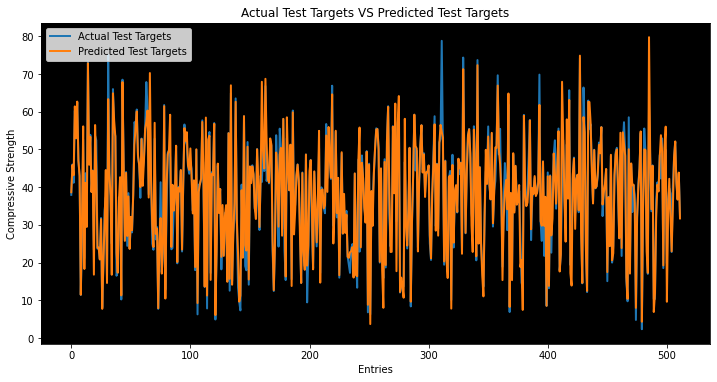

In [7]:

print("Comparision between Predicted value and Actual test value ")

plt.figure(figsize=(13,28))
plt.subplot(211)
prediction = pd.DataFrame(predict_test_Y)  
testy = test_Y.reset_index()["compressive_strength"]
   
ax = testy.plot(label="Actual Test Targets",figsize=(12,13),linewidth=2)
ax = prediction[0].plot(label = "Predicted Test Targets",figsize=(12,13),linewidth=2)

plt.legend(loc="best")
plt.title("Actual Test Targets VS Predicted Test Targets")
plt.xlabel("Entries")
plt.ylabel("Compressive Strength")
ax.set_facecolor("k")

In [8]:
'''
inputName=["cement","furnace_slag","fly_ash","water","super_plasticizer","coarse_agg","fine_agg","age"]
new=[]
for i in inputName:
  print(i,":",end='\t\t\t\t')
  new.append(float(input()))
new_X=np.array(new).reshape(1,-1)
predict_new_Y = xgr.predict(new_X)
print("Predicted Compressive Strength of Concrete => ",predict_new_Y)
'''

'\ninputName=["cement","furnace_slag","fly_ash","water","super_plasticizer","coarse_agg","fine_agg","age"]\nnew=[]\nfor i in inputName:\n  print(i,":",end=\'\t\t\t\t\')\n  new.append(float(input()))\nnew_X=np.array(new).reshape(1,-1)\npredict_new_Y = xgr.predict(new_X)\nprint("Predicted Compressive Strength of Concrete => ",predict_new_Y)\n'

## **Predict Concrete Strength**

In [9]:
'''
labels=['cement', 'furnace_slag', 'fly_ash', 'water', 'super_plasticizer','coarse_agg', 'fine_agg', 'age']
s=input().split(' ')
s1 = pd.Series([float(s[0])], name='cement')
s2 = pd.Series([float(s[1])], name='furnace_slag')
s3 = pd.Series([float(s[2])], name='fly_ash')
s4 = pd.Series([float(s[3])], name='water')
s5 = pd.Series([float(s[4])], name='super_plasticizer')
s6 = pd.Series([float(s[5])], name='coarse_agg')
s7 = pd.Series([float(s[6])], name='fine_agg')
s8 = pd.Series([float(s[7])], name='stone_dust')
s9 = pd.Series([float(s[8])], name='age')
new = pd.concat([s1, s2, s3, s4, s5, s6, s7, s8,s9], axis=1)
predictions=xgr.predict(new)
#print("CEMENT STRENTH:\r")
print("Predicted Composite Concrete Strength =",predictions[0],"MPa")
'''

'\nlabels=[\'cement\', \'furnace_slag\', \'fly_ash\', \'water\', \'super_plasticizer\',\'coarse_agg\', \'fine_agg\', \'age\']\ns=input().split(\' \')\ns1 = pd.Series([float(s[0])], name=\'cement\')\ns2 = pd.Series([float(s[1])], name=\'furnace_slag\')\ns3 = pd.Series([float(s[2])], name=\'fly_ash\')\ns4 = pd.Series([float(s[3])], name=\'water\')\ns5 = pd.Series([float(s[4])], name=\'super_plasticizer\')\ns6 = pd.Series([float(s[5])], name=\'coarse_agg\')\ns7 = pd.Series([float(s[6])], name=\'fine_agg\')\ns8 = pd.Series([float(s[7])], name=\'stone_dust\')\ns9 = pd.Series([float(s[8])], name=\'age\')\nnew = pd.concat([s1, s2, s3, s4, s5, s6, s7, s8,s9], axis=1)\npredictions=xgr.predict(new)\n#print("CEMENT STRENTH:\r")\nprint("Predicted Composite Concrete Strength =",predictions[0],"MPa")\n'

In [10]:
#train_X =pd.DataFrame(train_X)
#test_X =pd.DataFrame(test_X)

#train_Y =pd.DataFrame(train_Y)
#test_Y =pd.DataFrame(test_Y)

pred_train_Y =pd.DataFrame(predict_train_Y)
pred_test_Y = pd.DataFrame(predict_test_Y)


XX=pd.concat([train_X,test_X],ignore_index=True)
YY=pd.concat([train_Y,test_Y],ignore_index=True)
RR=pd.concat([pred_train_Y,pred_test_Y],ignore_index=True)

XX.columns = ['cement','blast_furnace','fly_ash','water', 'superplasticizer','coarse_agg','fine_agg','stone_dust','age']#,'strength']

XX['Experimental_R']=YY
XX['Predicted_R']=RR

XX.to_csv("prediction_results_XGB.csv")

In [13]:
predicted_data1=pd.read_csv("/content/prediction_results_XGB.csv")

Text(0.5, 0, 'Experimental_Result')

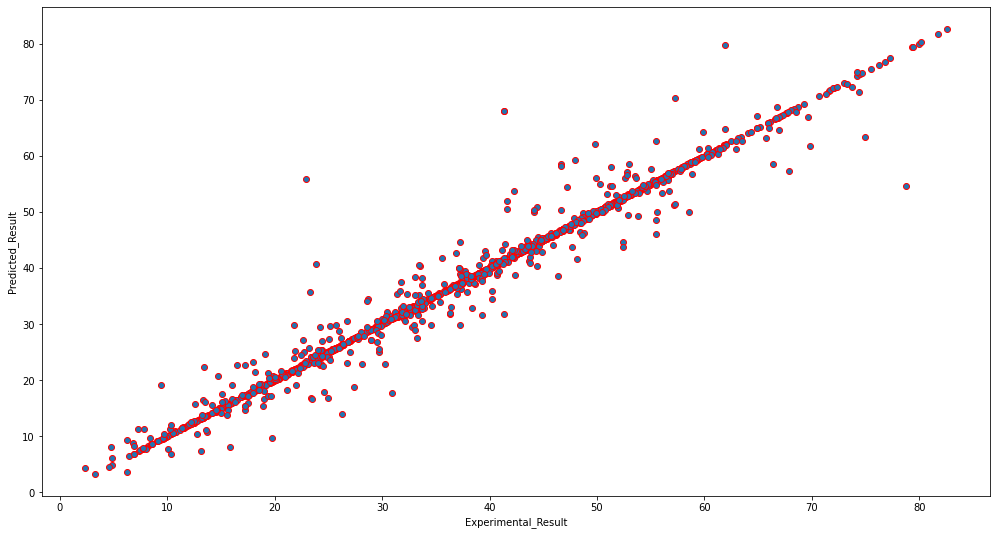

In [14]:
# scatter plot of Concrete Strength Experimented and XGPredicted
plt.figure(figsize=[17,9])
plt.scatter(y='Predicted_R',x='Experimental_R',edgecolors='red',data=predicted_data1)
plt.ylabel('Predicted_Result')
plt.xlabel('Experimental_Result')


In [15]:
# Determined what rows are causing trouble

predicted_data1["Difference"] = predicted_data1["Experimental_R"] - predicted_data1["Predicted_R"]
print(max(predicted_data1["Difference"]))
outlier_rows=[]
for i in predicted_data1.index:
  #print(i)
  if predicted_data1["Difference"][i]>9:
    print(i, predicted_data1["Difference"][i],predicted_data1["Experimental_R"][i], predicted_data1["Predicted_R"][i])
    outlier_rows.append(i)

# To be removed for diff greater than 8 is just 7, so going forward with it.

24.181407039999975
1224 11.64603975999998 74.98740975999998 63.34137
1256 10.557417679999993 67.86512268 57.307705000000006
1268 9.489729399999998 41.2996124 31.809883000000003
1466 13.242464400000003 30.9574724 17.715007999999997
1504 24.181407039999975 78.80021203999998 54.618805
1553 9.381054679999998 55.45455468 46.0735
1613 12.363607984000003 26.258003984000002 13.894395999999999
1693 10.157601491999998 19.765208492 9.607607000000002


In [16]:
predicted_data1.head
predicted_data1=predicted_data1.drop(outlier_rows)
'''for i in outlier_rows:
  print(predicted_data1.loc[[i]])
  predicted_data1.drop(i)
  print(predicted_data1.loc[[i]])
'''#predicted_data1.tail


'for i in outlier_rows:\n  print(predicted_data1.loc[[i]])\n  predicted_data1.drop(i)\n  print(predicted_data1.loc[[i]])\n'

In [17]:
print("Number of rows    :",predicted_data1.shape[0])
print("Number of columns :",predicted_data1.shape[1])

Number of rows    : 1697
Number of columns : 13


In [18]:
predicted_data1.head

<bound method NDFrame.head of       Unnamed: 0  cement  ...  Predicted_R  Difference
0              0  331.00  ...    37.784733    0.129552
1              1  255.00  ...     8.228575   -0.024500
2              2  510.00  ...    51.678820   -0.044920
3              3  510.00  ...    54.389630   -0.125630
4              4  152.00  ...    12.191728   -0.015582
...          ...     ...  ...          ...         ...
1700        1700  510.00  ...    52.129707   -0.125007
1701        1701  355.90  ...    41.252090   -0.383400
1702        1702  313.30  ...    36.694252    0.110666
1703        1703  251.37  ...    43.859184   -0.277406
1704        1704  510.00  ...    31.704073    0.551927

[1697 rows x 13 columns]>

In [19]:
predicted_data1=predicted_data1.drop(columns='Predicted_R')

In [20]:
predicted_data1=predicted_data1.drop(columns='Difference')

In [21]:
predicted_data1.head


<bound method NDFrame.head of       Unnamed: 0  cement  blast_furnace  ...  stone_dust    age  Experimental_R
0              0  331.00            0.0  ...         NaN   90.0       37.914285
1              1  255.00            0.0  ...         NaN    3.0        8.204075
2              2  510.00            0.0  ...      210.12   88.0       51.633900
3              3  510.00            0.0  ...      315.18   58.0       54.264000
4              4  152.00            0.0  ...         NaN   28.0       12.176146
...          ...     ...            ...  ...         ...    ...             ...
1700        1700  510.00            0.0  ...      105.06   58.0       52.004700
1701        1701  355.90            0.0  ...         NaN   28.0       40.868690
1702        1702  313.30            0.0  ...         NaN   28.0       36.804918
1703        1703  251.37            0.0  ...         NaN  100.0       43.581778
1704        1704  510.00            0.0  ...        0.00    7.0       32.256000

[1697 row

In [22]:
predicted_data1.to_csv("prediction_results_Cleaned_for_raw_input.csv")

In [23]:
predicted_data1=predicted_data1.fillna(0)

In [24]:
predicted_data1.head


<bound method NDFrame.head of       Unnamed: 0  cement  blast_furnace  ...  stone_dust    age  Experimental_R
0              0  331.00            0.0  ...        0.00   90.0       37.914285
1              1  255.00            0.0  ...        0.00    3.0        8.204075
2              2  510.00            0.0  ...      210.12   88.0       51.633900
3              3  510.00            0.0  ...      315.18   58.0       54.264000
4              4  152.00            0.0  ...        0.00   28.0       12.176146
...          ...     ...            ...  ...         ...    ...             ...
1700        1700  510.00            0.0  ...      105.06   58.0       52.004700
1701        1701  355.90            0.0  ...        0.00   28.0       40.868690
1702        1702  313.30            0.0  ...        0.00   28.0       36.804918
1703        1703  251.37            0.0  ...        0.00  100.0       43.581778
1704        1704  510.00            0.0  ...        0.00    7.0       32.256000

[1697 row

In [25]:
predicted_data1.to_csv("prediction_results_Cleaned_for_raw_input_NaN_resolved.csv")

# DATE: 21 September 2021

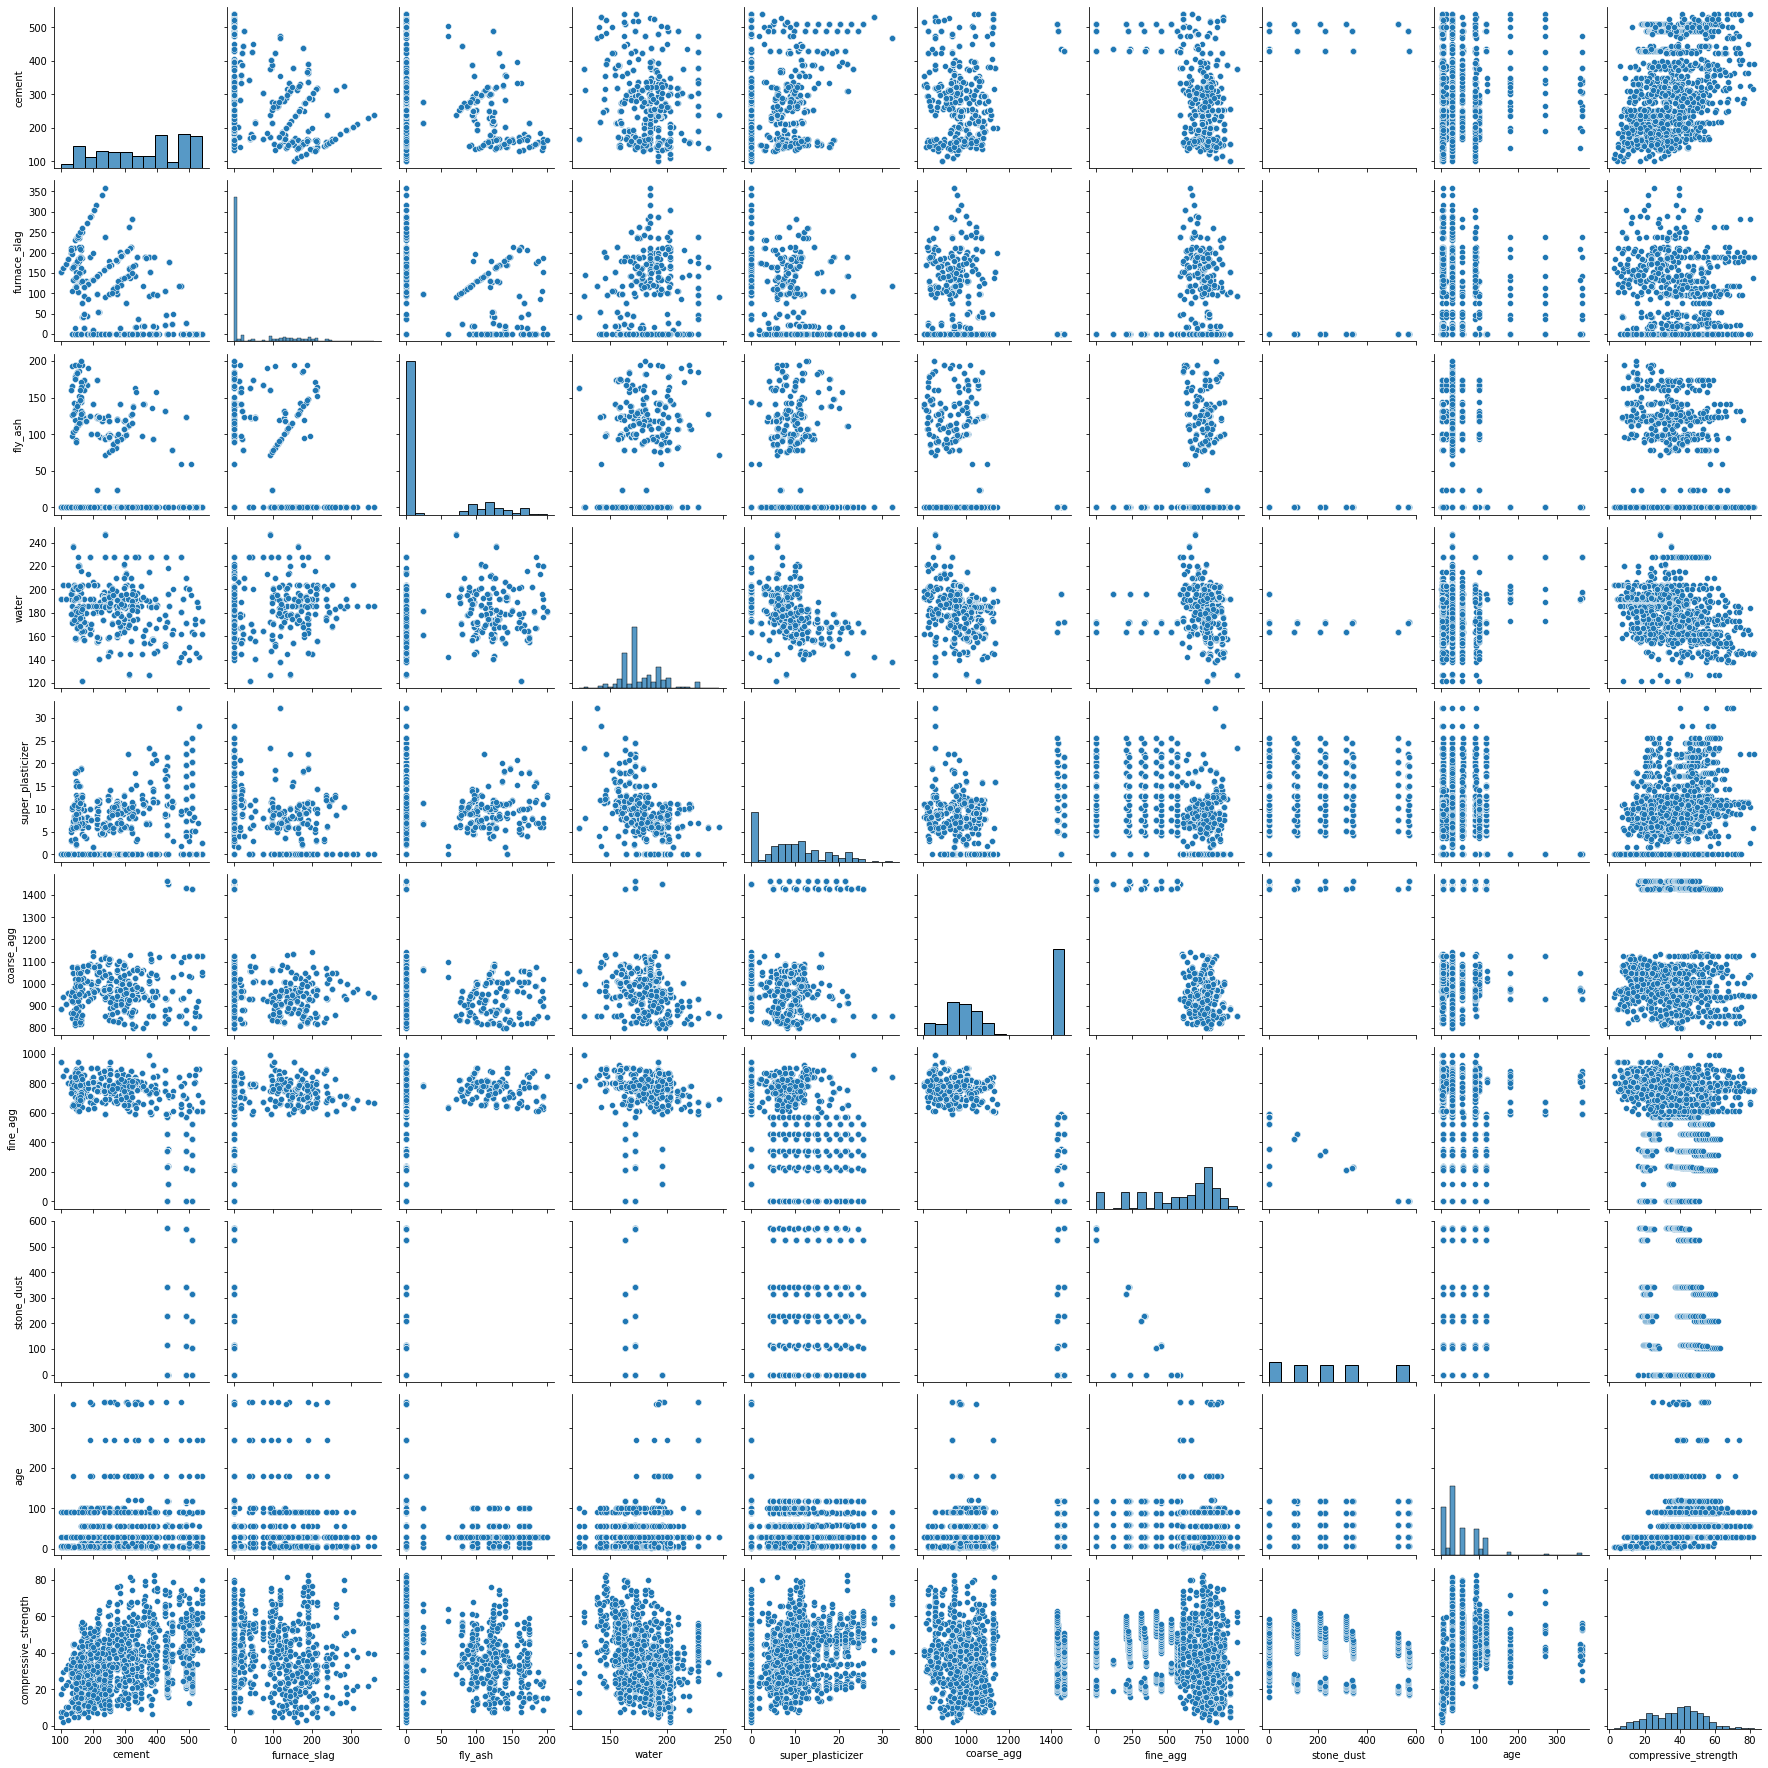

In [26]:
sns.pairplot(dataSet)

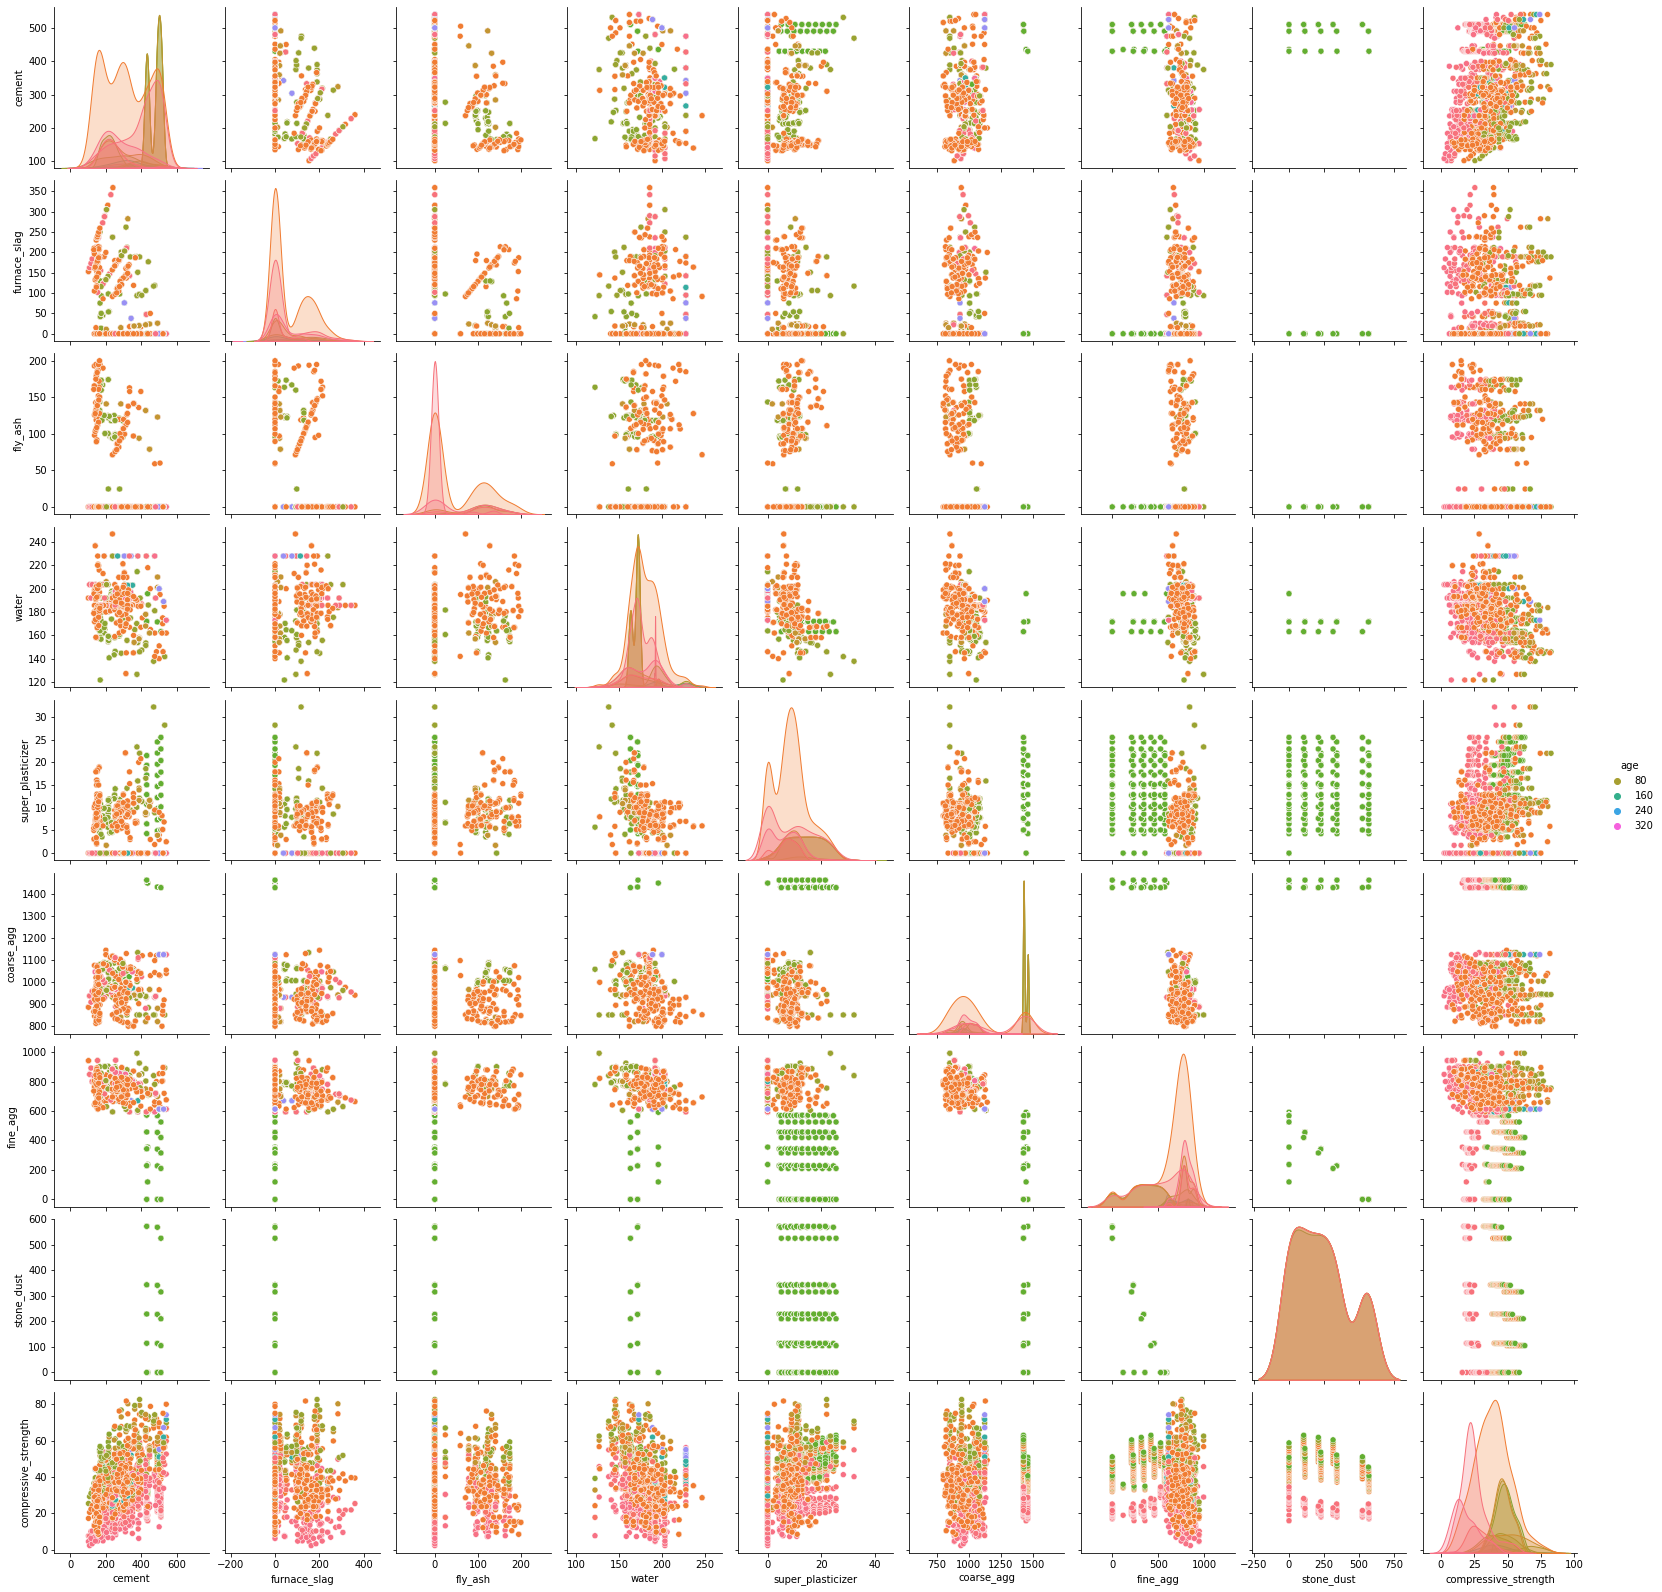

In [27]:
sns.pairplot(dataSet, hue="age", palette="husl")

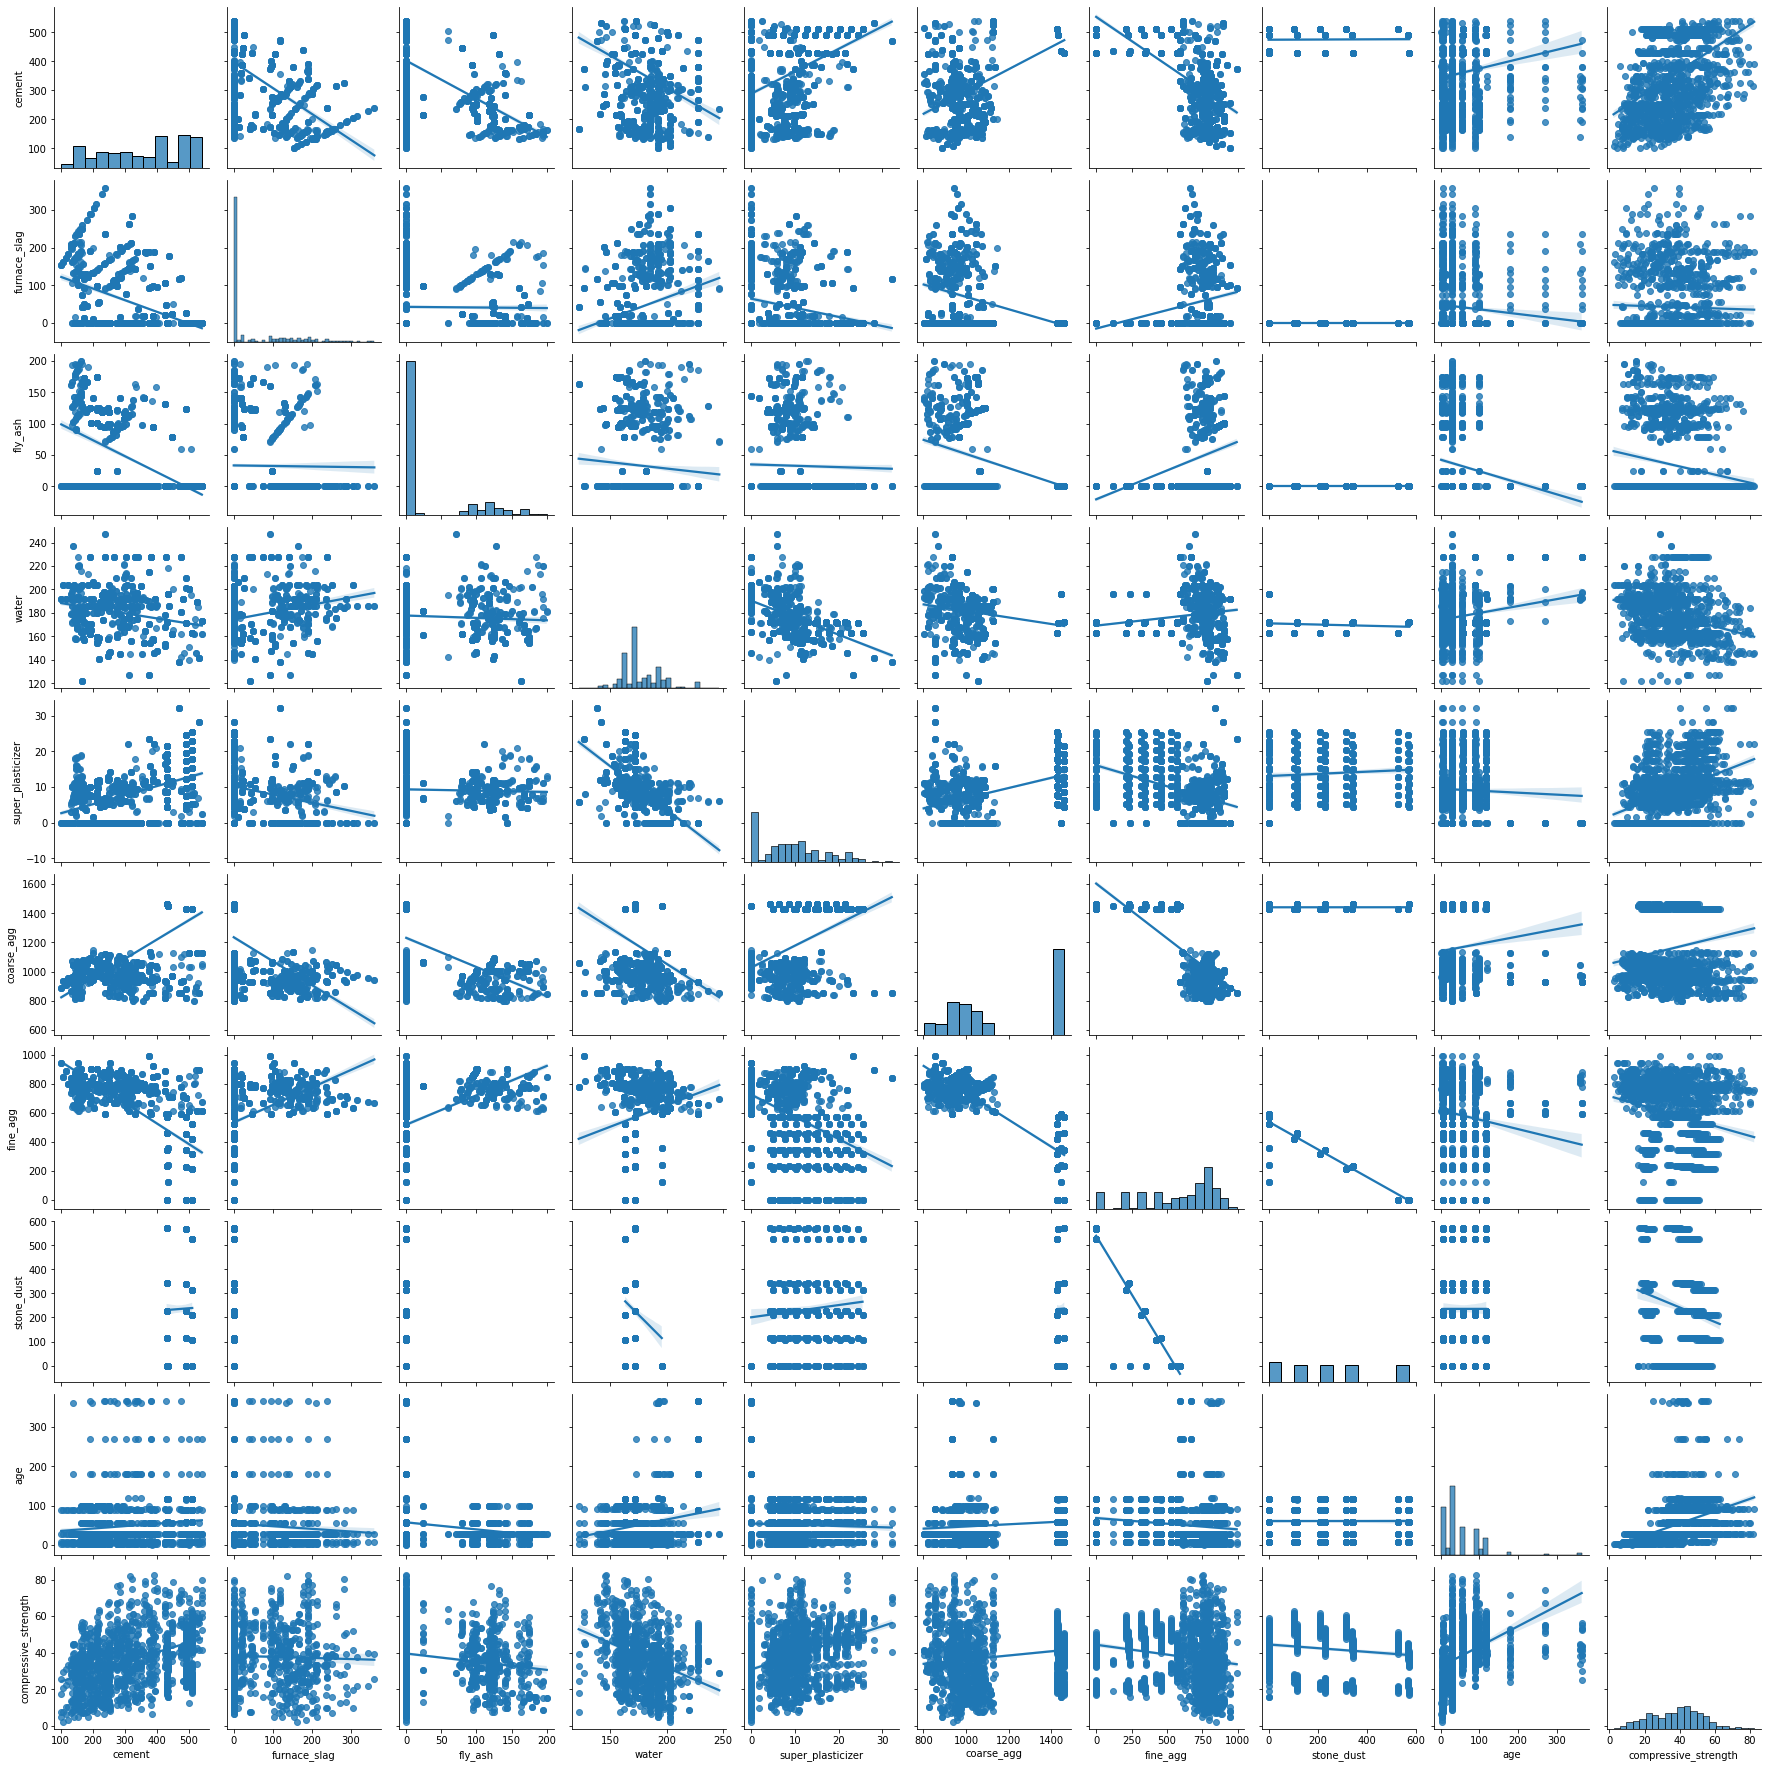

In [28]:
sns.pairplot(dataSet, kind='reg')

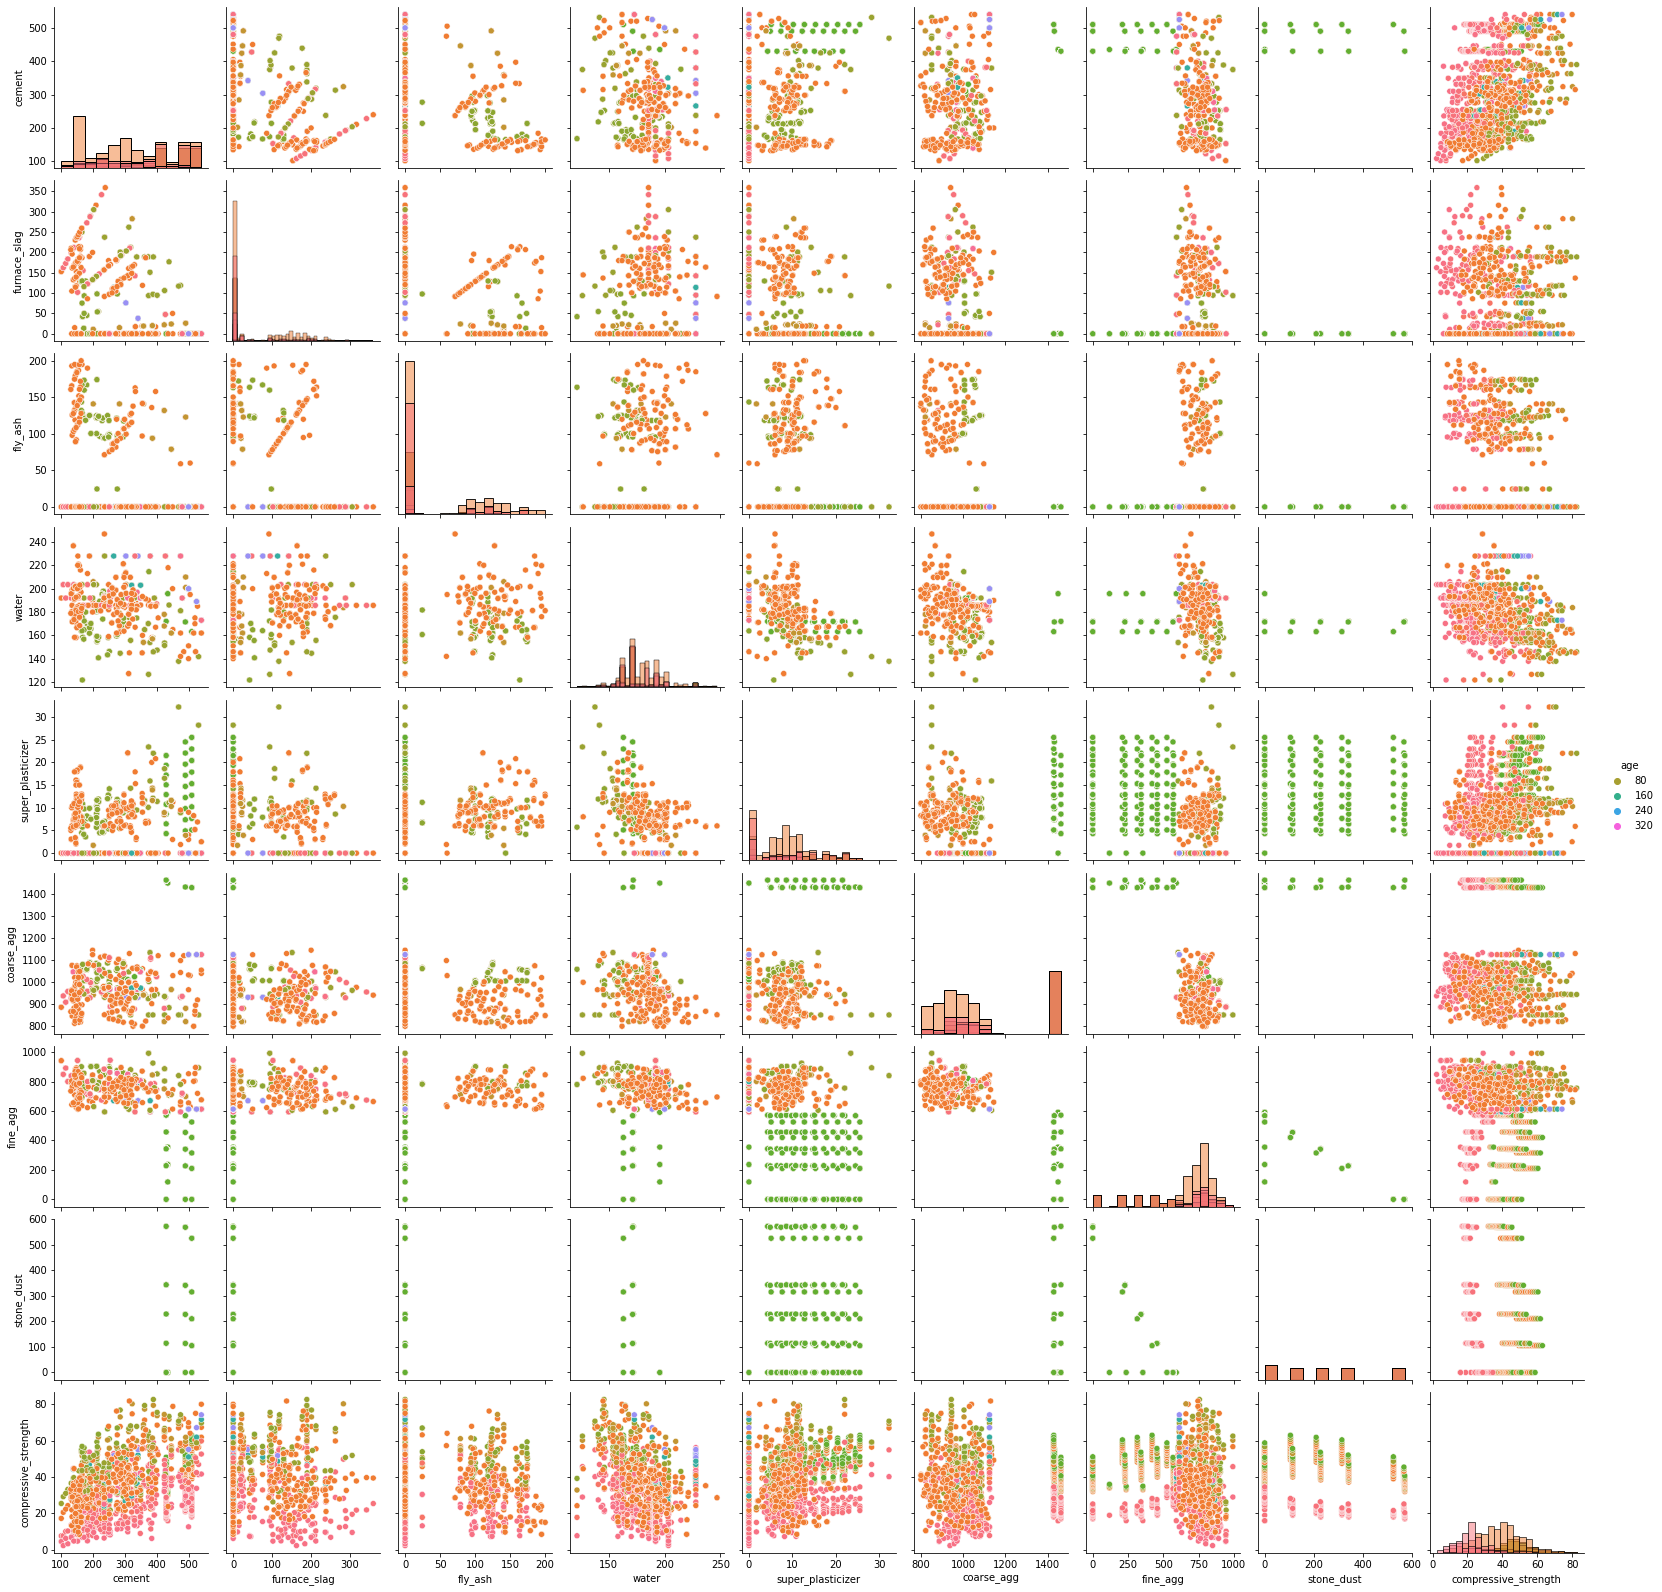

In [29]:
sns.pairplot(dataSet, hue="age", palette="husl",diag_kind="hist")

https://seaborn.pydata.org/generated/seaborn.pairplot.html

Maybe show this to Dad, so that he may assess.


Use argument:-> var to select specific rows&cols for pairplot.

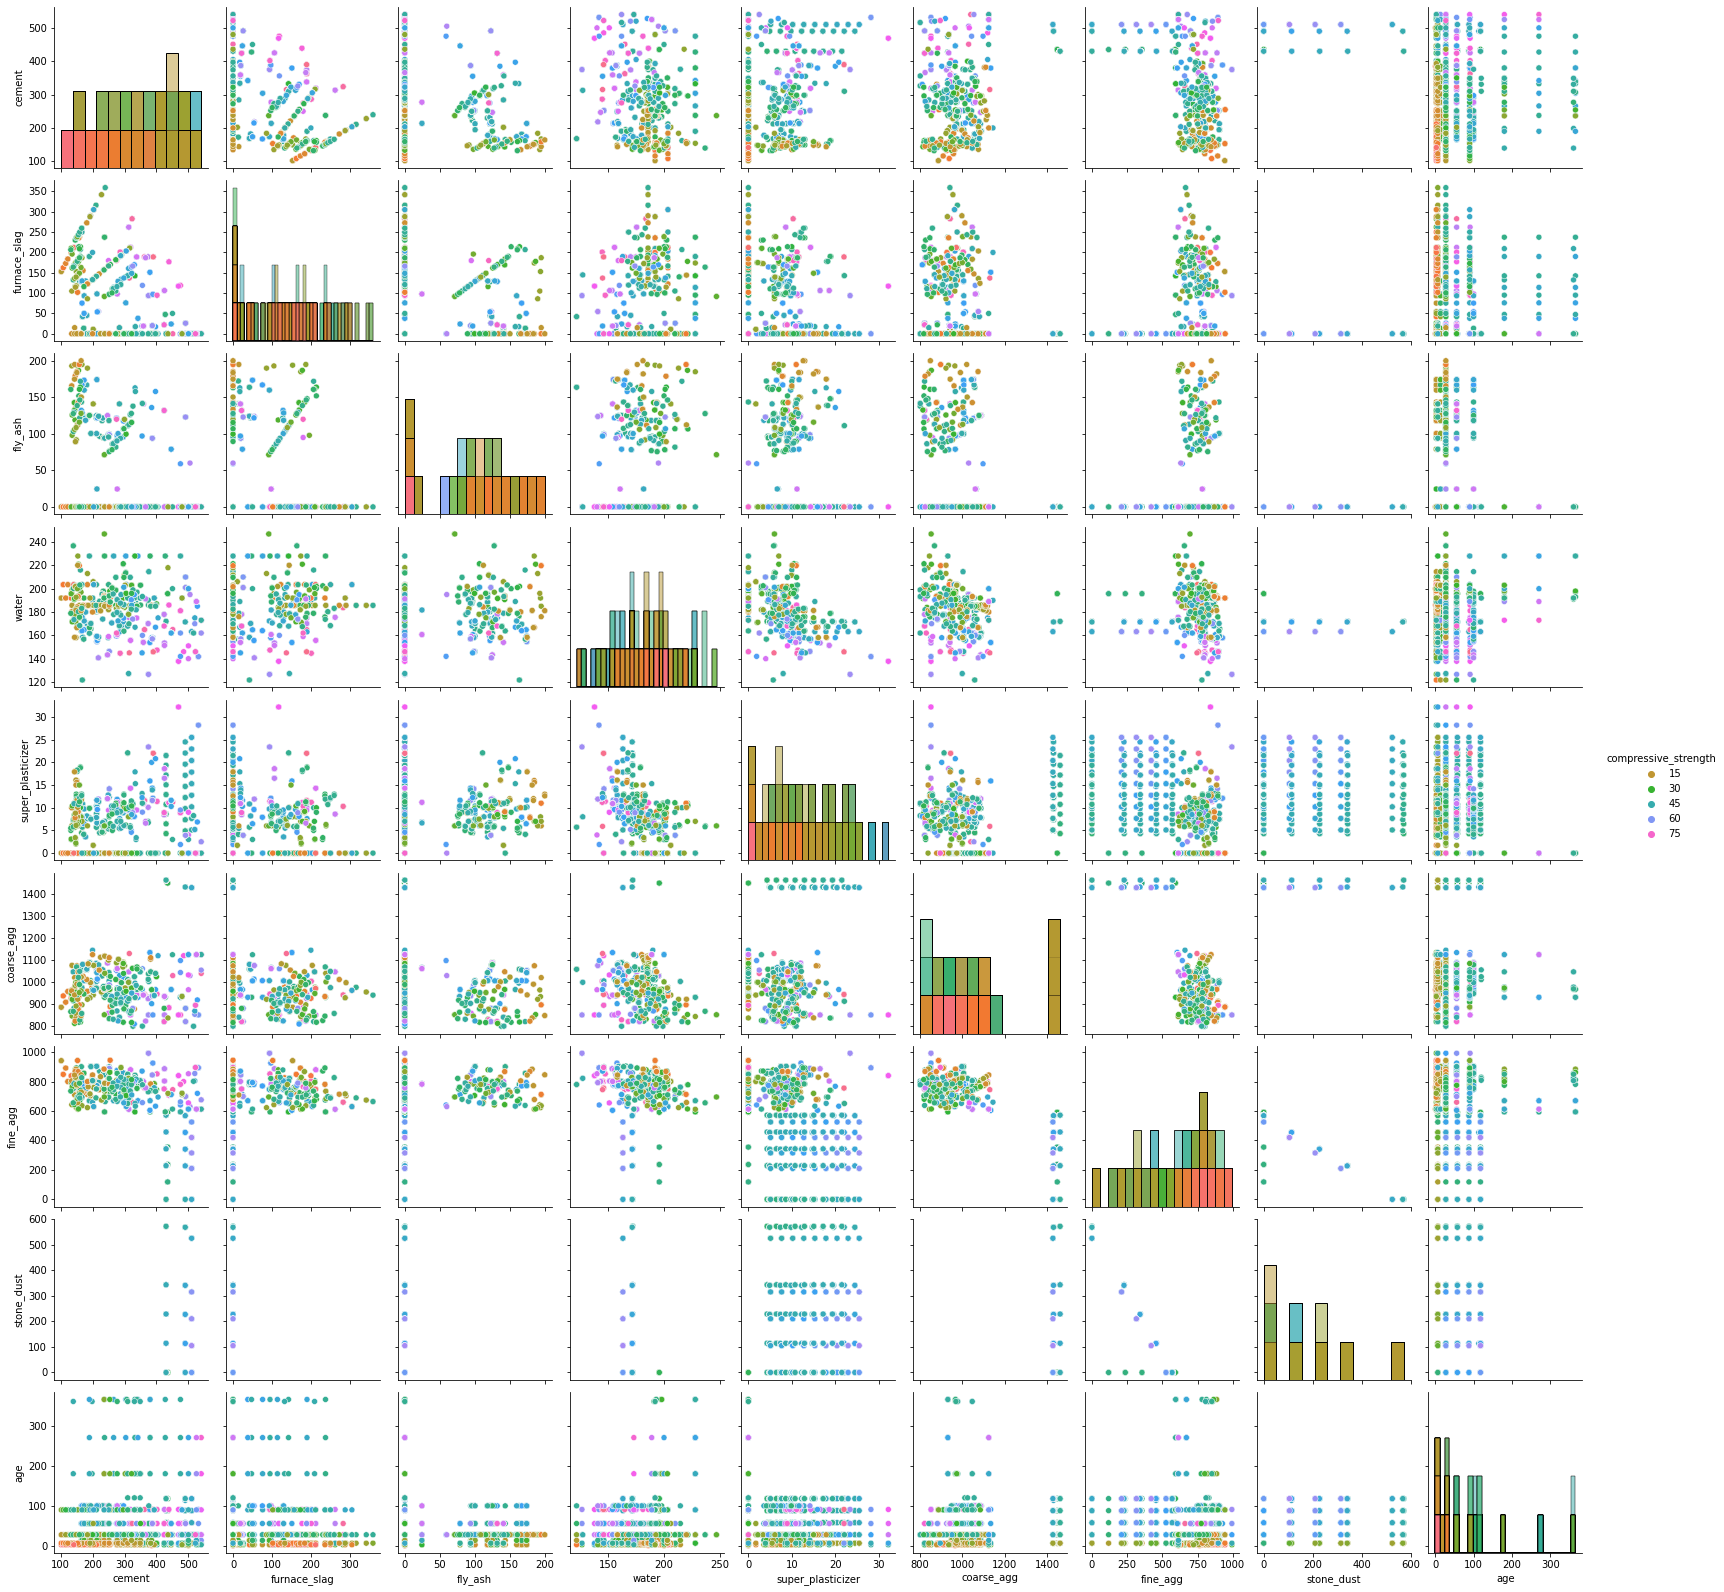

In [30]:
sns.pairplot(dataSet, hue="compressive_strength", palette="husl",diag_kind="hist")

Text(0.5, 0, 'cement')

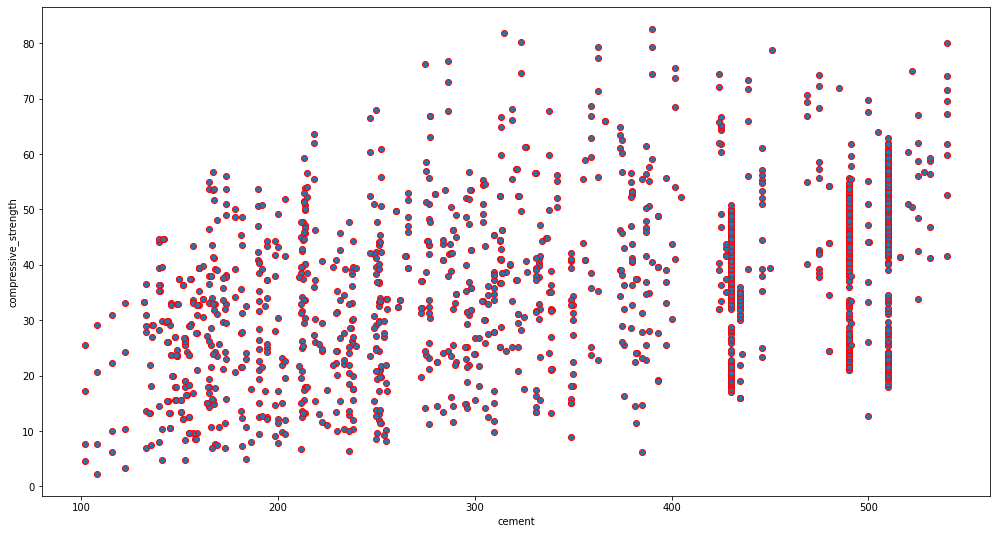

In [31]:
# scatter plot of Concrete Strength and Cement quantity
plt.figure(figsize=[17,9])
plt.scatter(y='compressive_strength',x='cement',edgecolors='red',data=dataSet)
plt.ylabel('compressive_strength')
plt.xlabel('cement')

Text(0.5, 0, 'water')

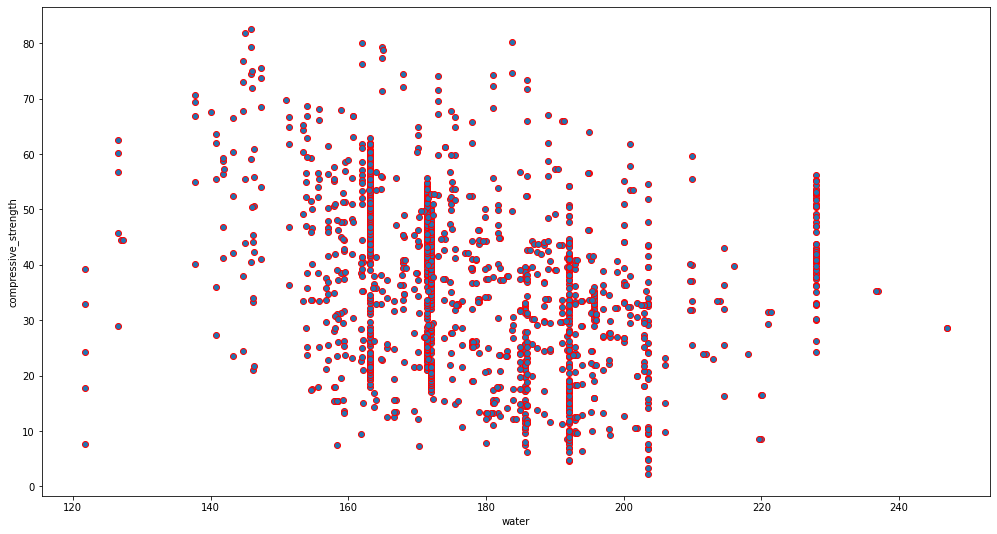

In [32]:
# scatter plot of Concrete Strength and Water quantity
plt.figure(figsize=[17,9])
plt.scatter(y='compressive_strength',x='water',edgecolors='red',data=dataSet)
plt.ylabel('compressive_strength')
plt.xlabel('water')


This scatter plot is same as the plot in the last row, 4th column in the pairplt matrix

"The below diagonal matrix is above DM with reversed axis."

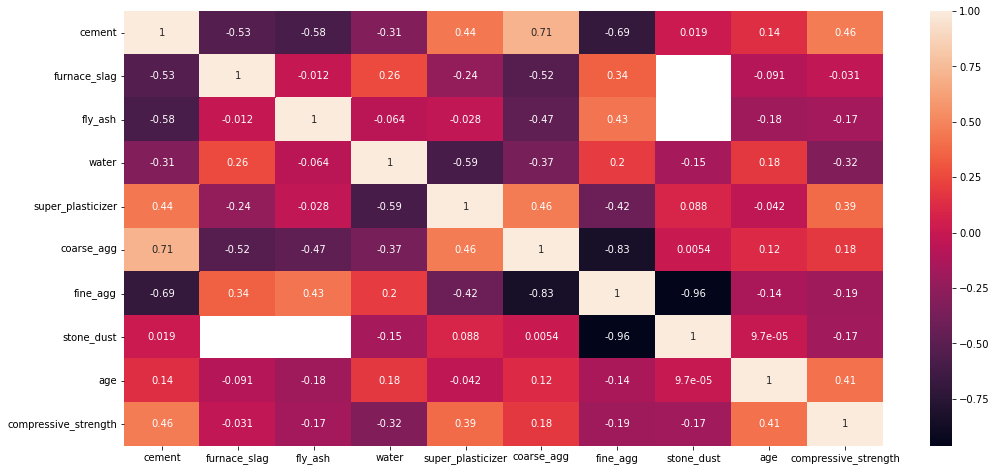

In [33]:
plt.figure(figsize=[17,8])

#ploting correlation plot

sns.heatmap(dataSet.corr(),annot=True)

The above numeric figures in the heatmap are correlation coefficent 

https://www.analyticsvidhya.com/blog/2021/01/beginners-guide-to-pearsons-correlation-coefficient/

https://towardsdatascience.com/all-about-heatmaps-bb7d97f099d7

Pearson's Correlation Coefficient - measure of the strength and direction of a linear correlation between two variables.

The value ranges [-1,+1] ; -1 means there is a negative correlation bewten the 2 variables(ie. the increase of one, leads to decrease of teh other) and 0 means no correlation and +1 means there is a positive correlation.

CHANGE color scheme with argument: cmap="YlGnBu"

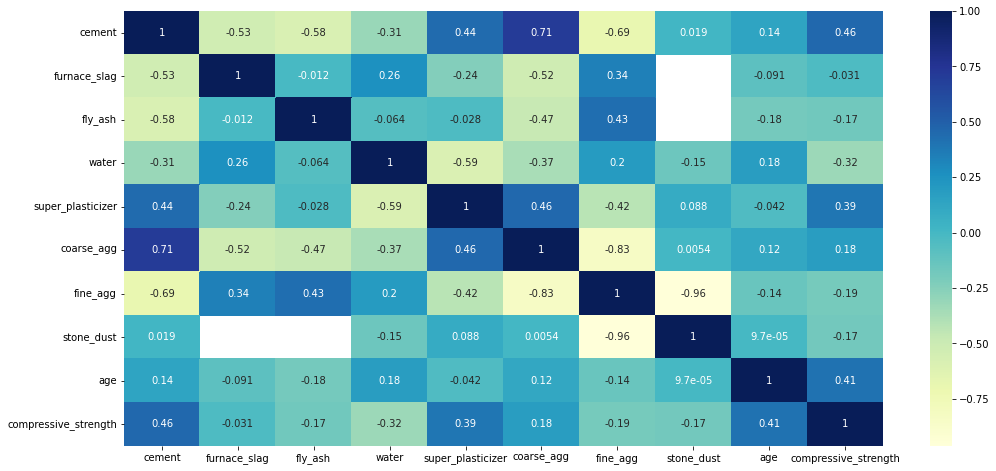

In [34]:
plt.figure(figsize=[17,8])

#ploting correlation plot

sns.heatmap(dataSet.corr(),annot=True, cmap="YlGnBu")

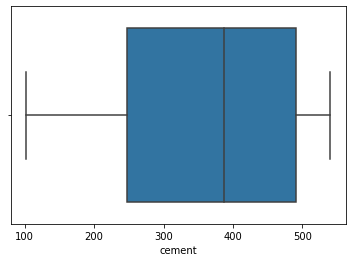

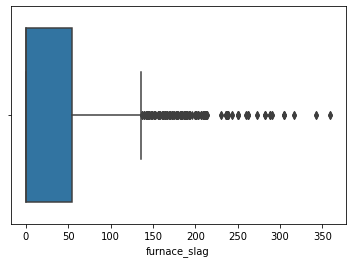

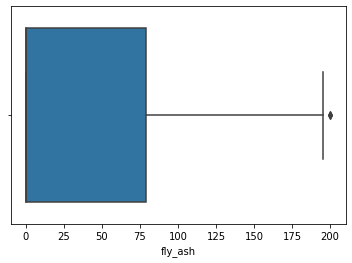

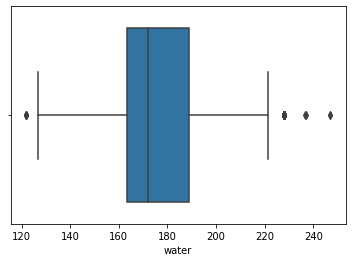

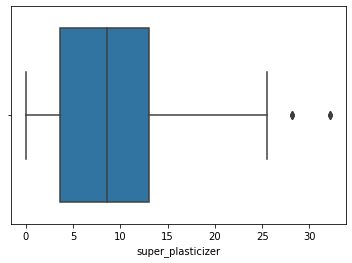

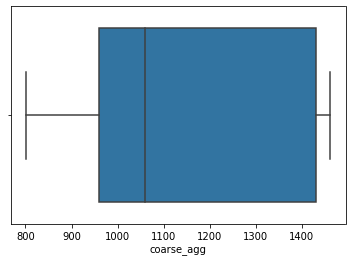

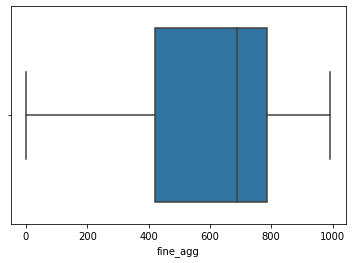

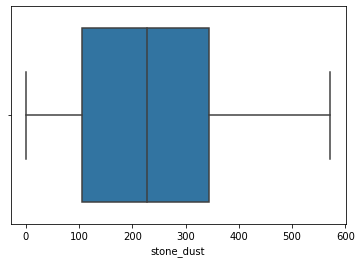

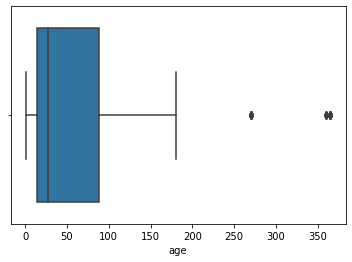

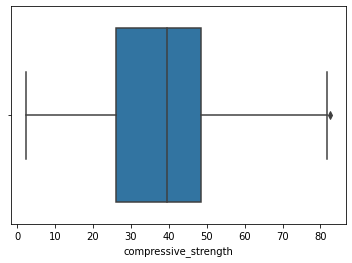

In [35]:
#l=['cement','slag','flyash','water','superplasticizer','coarseaggregate','fineaggregate','age','csMPa']
l=data1.columns
for i in l:
    sns.boxplot(x=dataSet[i])
    plt.show()

BOXPLOT

In [36]:
import pickle
filename="concrete_strength_random_forest_model"
savedfile=pickle.dump(model, open(filename,'wb'))

NameError: ignored

In [ ]:
plt.figure(figsize=[17,8])
sns.scatterplot(y="compressive_strength", x="cement", hue="water",size="age", data=dataSet, sizes=(30,500))
# I don't think this is accurate figuring and this can be made more intuitive and better.

In [ ]:
plt.figure(figsize=[17,8])
sns.scatterplot(y="compressive_strength", x="cement", hue="super_plasticizer",size="age", data=dataSet, sizes=(30,500))
# I don't think this is accurate figuring and this can be made more intuitive and better.

We seem to be lacking in data of the case where age is high, superPlasticizer is greater than 30.

This case could give a more clear picture since each of these features individually are known to increase concrete strength.

In [ ]:
#plt.scatter(test_X, test_Y, color = 'red')
#plt.plot(train_X, linearRegressor.predict(train_Y), color = 'blue')

In [ ]:
predicted_data=pd.read_csv("/content/prediction_results_RF.csv")

# scatter plot of Concrete Strength Experimented and RFPredicted
plt.figure(figsize=[17,9])
plt.scatter(y='Prediction_R',x='Experimental_R',edgecolors='red',data=predicted_data)
plt.ylabel('Predicted_Result')
plt.xlabel('Experimental_Result')


In [ ]:
predicted_data["Difference"] = predicted_data["Experimental_R"] - predicted_data["Prediction_R"]
predicted_data.head